In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1500

In [3]:
df = pd.read_excel('C:/Users/Anastasiya.Mittseva/PycharmProjects/ProjectPredictSolidity/входные данные/prepared_data.xlsx')

In [4]:
df.head()

,Сталь,С,Mn,Si,S,P,Cr,Ni,Cu,Mo,V,Nb,Ti,Al,N,O,B,Сэкв,Тнагрева,"время выдержки, мин",параметр закалки,Ас1,Ас3,V800-500 °C/c,%Ф,%П,%Б,%М,%А остаточный,HV,HB,HRC,HRB
0,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850.0,10,810.626512,735.0,795.0,0.11,NaN,NaN,NaN,NaN,NaN,180.0,NaN,NaN,NaN
1,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850.0,10,810.626512,735.0,795.0,0.31,NaN,NaN,NaN,NaN,NaN,180.0,NaN,NaN,NaN
2,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850.0,10,810.626512,735.0,795.0,1.00,NaN,NaN,NaN,NaN,NaN,180.0,NaN,NaN,NaN
3,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850.0,10,810.626512,735.0,795.0,3.40,NaN,NaN,NaN,NaN,NaN,195.0,NaN,NaN,NaN
4,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850.0,10,810.626512,735.0,795.0,7.00,NaN,NaN,NaN,NaN,NaN,200.0,NaN,NaN,NaN


## Подготовка данных

In [5]:
def convertHRCtoHV(x):
    y = 0.0001076546813696400 * x ** 4 - 0.01404920211793480 * x ** 3 + 0.7989548243359580 * x ** 2 - 13.82475417563670 * x + 289.8692821768870
    return y

In [6]:
def repl(x):
    if np.isnan(x):
        return round(convertHRCtoHV(df['HRC'].loc[x.index]),2)
    else:
        return x

In [7]:
df['HRC'] = df['HRC'].map(convertHRCtoHV)

In [8]:
df['HV'] = df['HV'].combine_first(df['HRC'])

In [9]:
df = df.drop('HRC',1)

In [10]:
columns = ['HB', 'HRB']
df = df.drop(columns, 1)

In [11]:
df = df.fillna(0)

In [12]:
df = df[~(df['HV'] == 0.0)]

In [13]:
df = df.drop(df[df['%А остаточный'] != 0].index)

In [14]:
df = df.drop('%А остаточный',1)

In [15]:
df = df[~(df['V800-500 °C/c']== 0.0)]

In [16]:
df = df[~(df['Тнагрева']== 0.0)]

In [17]:
# df = df.drop(df[(df['%Ф']+df['%П']+df['%Б']+df['%М']) != 100].index)

In [18]:
df = df.reset_index()

In [19]:
df = df.drop('index',1)

In [20]:
df.head()

,Сталь,С,Mn,Si,S,P,Cr,Ni,Cu,Mo,V,Nb,Ti,Al,N,O,B,Сэкв,Тнагрева,"время выдержки, мин",параметр закалки,Ас1,Ас3,V800-500 °C/c,%Ф,%П,%Б,%М,HV
0,32г2,0.32,1.1,0.27,0.02,0.017,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549333,850.0,10,810.626512,735.0,795.0,0.11,0.0,0.0,0.0,0.0,180.0
1,32г2,0.32,1.1,0.27,0.02,0.017,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549333,850.0,10,810.626512,735.0,795.0,0.31,0.0,0.0,0.0,0.0,180.0
2,32г2,0.32,1.1,0.27,0.02,0.017,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549333,850.0,10,810.626512,735.0,795.0,1.00,0.0,0.0,0.0,0.0,180.0
3,32г2,0.32,1.1,0.27,0.02,0.017,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549333,850.0,10,810.626512,735.0,795.0,3.40,0.0,0.0,0.0,0.0,195.0
4,32г2,0.32,1.1,0.27,0.02,0.017,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549333,850.0,10,810.626512,735.0,795.0,7.00,0.0,0.0,0.0,0.0,200.0


## Графики 

In [21]:
import  seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

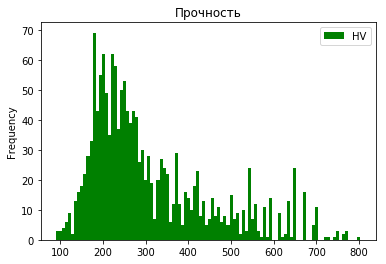

In [22]:
df.plot(y='HV', kind='hist', color='green', title='Прочность', bins=100)
plt.show()

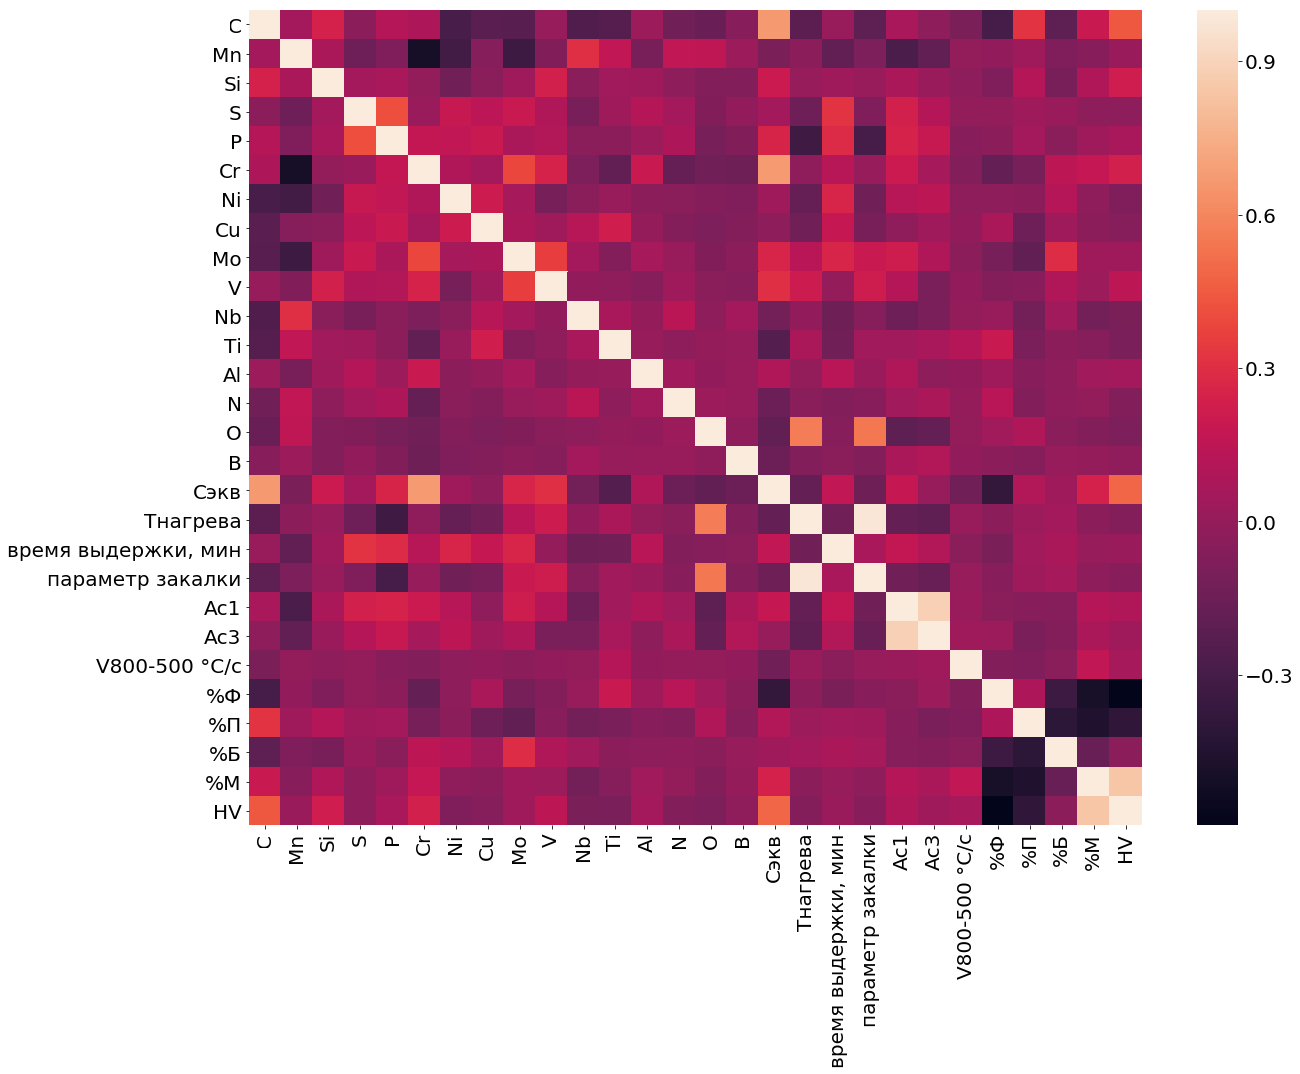

In [23]:
plt.rcParams.update({'font.size': 20})
plt.subplots(figsize=(20,15))

corr = df.corr()
corr_hm = sns.heatmap(corr)
fig = corr_hm.get_figure()

In [24]:
df_col = ['С', 'Mn', 'Si', 'S', 'P', 'Cr', 'Ni', 'Cu', 'Mo', 'V', 'Nb', 'Ti',
       'Al', 'N', 'O', 'B', 'Сэкв','параметр закалки','V800-500 °C/c']

In [25]:
ls_targets = ['HV']

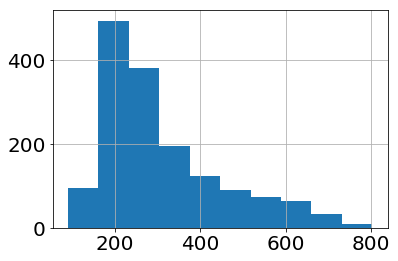

In [26]:
df['HV'].hist()

In [27]:
df[df_col+ ls_targets].corr()

,С,Mn,Si,S,P,Cr,Ni,Cu,Mo,V,Nb,Ti,Al,N,O,B,Сэкв,параметр закалки,V800-500 °C/c,HV
С,1.000000,0.057072,0.245483,-0.038817,0.118130,0.088908,-0.285474,-0.218618,-0.232257,0.006045,-0.261344,-0.236528,0.023594,-0.137432,-0.159068,-0.049824,0.669721,-0.203692,-0.091662,0.442177
Mn,0.057072,1.000000,0.075555,-0.143536,-0.080066,-0.495709,-0.308493,-0.056107,-0.340289,-0.071913,0.304557,0.161343,-0.106173,0.165260,0.153760,0.026334,-0.089805,-0.085374,-0.002591,0.017038
Si,0.245483,0.075555,1.000000,0.049159,0.071515,-0.002682,-0.138863,-0.043771,0.031376,0.239789,-0.041057,0.043059,0.030836,-0.027344,-0.065998,-0.067887,0.200995,0.011562,-0.025585,0.218563
S,-0.038817,-0.143536,0.049159,1.000000,0.413396,0.021294,0.188681,0.142393,0.195782,0.103258,-0.107244,0.038536,0.112215,0.048570,-0.074459,-0.013504,0.052885,-0.081895,-0.008179,-0.024495
P,0.118130,-0.080066,0.071515,0.413396,1.000000,0.171554,0.162394,0.194410,0.077798,0.103431,-0.040170,-0.028822,0.026035,0.087909,-0.110640,-0.073956,0.252963,-0.297506,-0.046461,0.069061
Cr,0.088908,-0.495709,-0.002682,0.021294,0.171554,1.000000,0.096049,0.053401,0.387003,0.248985,-0.089297,-0.190263,0.194483,-0.173109,-0.128144,-0.146277,0.672848,0.009131,-0.065582,0.236566
Ni,-0.285474,-0.308493,-0.138863,0.188681,0.162394,0.096049,1.000000,0.205723,0.060839,-0.112491,-0.040163,0.011638,-0.035107,-0.041508,-0.062557,-0.081477,0.033229,-0.128322,-0.027159,-0.080282
Cu,-0.218618,-0.056107,-0.043771,0.142393,0.194410,0.053401,0.205723,1.000000,0.072864,0.033599,0.127741,0.223933,-0.002001,-0.059125,-0.083719,-0.060932,-0.023756,-0.107956,-0.013915,-0.056340
Mo,-0.232257,-0.340289,0.031376,0.195782,0.077798,0.387003,0.060839,0.072864,1.000000,0.357747,0.054197,-0.058972,0.061692,0.010089,-0.076482,-0.027847,0.264716,0.192074,-0.028604,0.033273
V,0.006045,-0.071913,0.239789,0.103258,0.103431,0.248985,-0.112491,0.033599,0.357747,1.000000,-0.010420,-0.018528,-0.052370,0.036510,-0.042081,-0.053807,0.305628,0.213868,-0.014946,0.147867


In [28]:
df[df_col].corrwith(df['HV'])

С                   0.442177
Mn                  0.017038
Si                  0.218563
S                  -0.024495
P                   0.069061
Cr                  0.236566
Ni                 -0.080282
Cu                 -0.056340
Mo                  0.033273
V                   0.147867
Nb                 -0.094375
Ti                 -0.102160
Al                  0.056145
N                  -0.070831
O                  -0.089645
B                  -0.019847
Сэкв                0.483525
параметр закалки   -0.051421
V800-500 °C/c       0.059889
dtype: float64

## GRNN 

In [29]:
from sklearn.model_selection import  train_test_split, GridSearchCV
from sklearn import model_selection, preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, matthews_corrcoef, median_absolute_error
from neupy import algorithms, estimators, environment
from scipy.stats import pearsonr

ls_train_col = ['С', 'Mn', 'Si', 'S', 'P', 'Cr', 'Ni', 'Cu', 'Mo', 'V', 'Nb', 'Ti', 'Al', 'N','O', 'B', 'Сэкв','параметр закалки','V800-500 °C/c']
targets = ['HV']

x_input = df[ls_train_col]
y_input = df[targets]

x, x_valid, y, y_valid = train_test_split(preprocessing.minmax_scale(x_input, feature_range = (0 , 1)),preprocessing.minmax_scale(y_input, feature_range = (0 , 1)),test_size=0.3)

def print_and_return_score(x, y, est):
    y_pred = est.predict(x)
#     mae = mean_absolute_error(y, y_pred)
#     mse = mean_squared_error(y, y_pred)
#     r2 = r2_score(y, y_pred)
    corr = pearsonr(y, y_pred)   
    
#     print('R^2: ', round(r2, 2))
#     print('MAE: ', round(mae, 2))
#     print('MSE: ', round(mse, 2))
    print('Corr: ', round(corr[0][0], 2))
    
    return corr[0][0]

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [30]:
x_train, x_test, y_train, y_test = train_test_split(preprocessing.minmax_scale(x, feature_range = (0 , 1)),preprocessing.minmax_scale(y, feature_range = (0 , 1)),test_size=0.3)

In [32]:
best_corr_test = 0
best_std = 0
i = 0
while i < 3:
    i = i + 0.01
    nw = algorithms.GRNN(std=i, verbose=False)
    nw.train(x_train, y_train)
    corr_test = print_and_return_score(x_test, y_test, nw)
    if corr_test > best_corr_test:
        best_corr_test = corr_test 
        best_std = i

Corr:  nan
Corr:  nan
Corr:  nan
Corr:  0.35
Corr:  0.34
Corr:  0.34
Corr:  0.34
Corr:  0.34
Corr:  0.34
Corr:  0.34
Corr:  0.34
Corr:  0.35
Corr:  0.36
Corr:  0.36
Corr:  0.37
Corr:  0.38
Corr:  0.39
Corr:  0.4
Corr:  0.4
Corr:  0.41
Corr:  0.42
Corr:  0.42
Corr:  0.43
Corr:  0.43
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.44
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.45
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.46
Corr:  0.47
Corr:  0.47
Corr:  0.47
Corr:  0.47
Corr:  0.47
Corr:  0.48
Corr:  0.48
Corr:  0.48
Corr:  0.48
Corr:  0.48
Corr:  0.48
Corr:  0.48
Corr:  0.49
Corr:  0.49
Corr:  0.49
Corr:  0.49
Corr:  0.49
Corr:  0.49
Corr:  0.49
Corr:  0.49
Corr:  0.49
Corr:  0.49
Corr:  0.49
Corr:  0.49
Corr:  0.49
Corr:  0.49
Corr:  0.49
Corr:  0.49
Corr:  0.5
Corr:  0.5
Corr:  0.5
Corr:  0.5
Corr:  0.5
Corr:  0.5
Corr:  0.5
Corr:  0.5
Corr:  0.5
Corr:  0.5
Corr:  0.5
Corr:  0.5
Corr:  0.5
Corr:  0.5
Corr:  0.5
Corr:  0.5
C

In [33]:
print(best_corr_test, best_std)

0.513042499583607 3.00999999999998


In [55]:
nw = algorithms.GRNN(std=0.9, verbose=False)

In [56]:
nw.train(x_train, y_train)

In [57]:
 corr_test = print_and_return_score(x_test, y_test, nw)

Corr:  0.5


In [58]:
corr_valid = print_and_return_score(x_valid, y_valid, nw)

Corr:  0.52


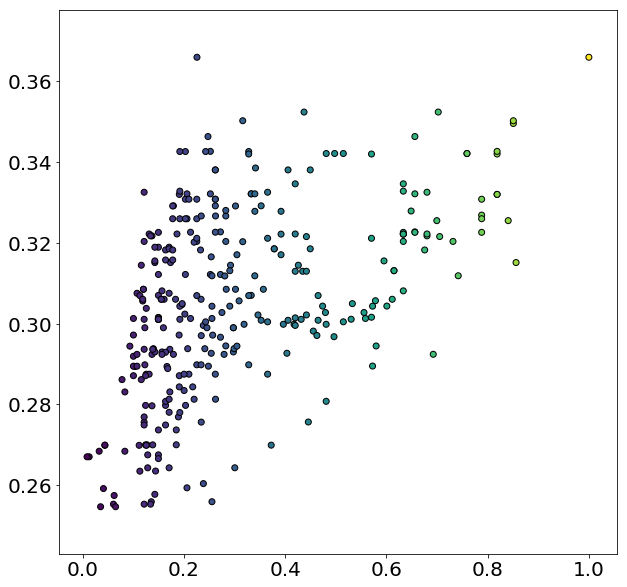

In [59]:
y_predict_test = nw.predict(x_test)
plt.subplots(figsize=(10,10))
plt.scatter(y_test, y_predict_test, marker='o', c=y_test, edgecolors='black', cmap='viridis')
plt.show()

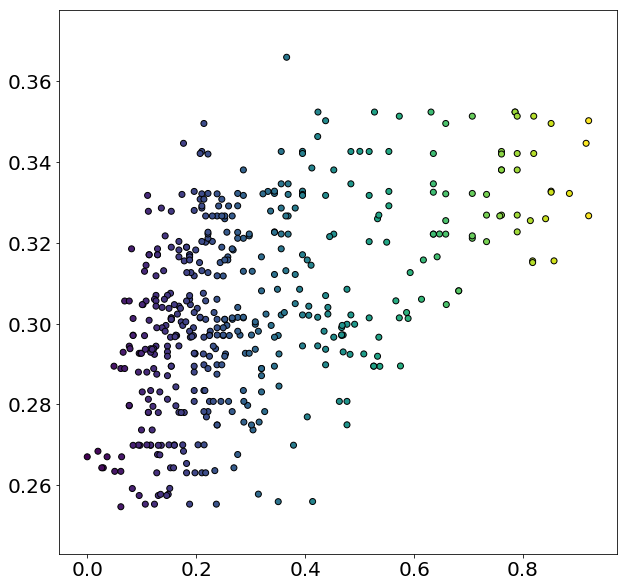

In [60]:
y_predict_valid= nw.predict(x_valid)
plt.subplots(figsize=(10,10))
plt.scatter(y_valid, y_predict_valid, marker='o', c=y_valid, edgecolors='black', cmap='viridis')
plt.show()

In [189]:
y_predict_test

array([[0.56876392],
       [0.17027072],
       [0.13540564],
       [0.20191549],
       [0.18374673],
       [0.20322013],
       [0.16600765],
       [0.11199951],
       [0.32342037],
       [0.17891975],
       [0.31709291],
       [0.2357471 ],
       [0.33555294],
       [0.32672401],
       [0.16304158],
       [0.20269459],
       [0.50570288],
       [0.3169754 ],
       [0.2467936 ],
       [0.21184375],
       [0.36199846],
       [0.2369964 ],
       [0.34332911],
       [0.30049627],
       [0.26509488],
       [0.21447895],
       [0.20264757],
       [0.42923476],
       [0.1938247 ],
       [0.22890314],
       [0.62402715],
       [0.41087168],
       [0.36479849],
       [0.301075  ],
       [0.13460618],
       [0.05263158],
       [0.12932331],
       [0.25464538],
       [0.23313617],
       [0.19111863],
       [0.52286542],
       [0.14939088],
       [0.59019178],
       [0.00719752],
       [0.20397907],
       [0.31929669],
       [0.23547869],
       [0.281